In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
df = pd.read_csv('train_AV3.csv')
df = df.drop(['Loan_ID'],axis=1)
df.head(50)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
from sklearn.impute import SimpleImputer
my_imputer_categorical = SimpleImputer(strategy='most_frequent')
my_imputer_continous = SimpleImputer(strategy='mean')
cont_df=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
cont_df=my_imputer_continous.fit_transform(cont_df)
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=cont_df
df=my_imputer_categorical.fit_transform(df);
df=pd.DataFrame(df)
df.columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0,146.412,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [6]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df ['Gender_1']=lb.fit_transform(df['Gender'])
df.drop(['Gender'],axis=1,inplace=True)
df ['Married_1']=lb.fit_transform(df['Married'])
df.drop(['Married'],axis=1,inplace=True)
df ['Education_1']=lb.fit_transform(df['Education'])
df.drop(['Education'],axis=1,inplace=True)
df ['Self_Employed_1']=lb.fit_transform(df['Self_Employed'])
df.drop(['Self_Employed'],axis=1,inplace=True)
df ['Property_Area_1']=lb.fit_transform(df['Property_Area'])
df.drop(['Property_Area'],axis=1,inplace=True)
df ['Loan_Status_1']=lb.fit_transform(df['Loan_Status'])
df.drop(['Loan_Status'],axis=1,inplace=True)
df ['Dependents_1']=lb.fit_transform(df['Dependents'])
df.drop(['Dependents'],axis=1,inplace=True)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_1,Married_1,Education_1,Self_Employed_1,Property_Area_1,Loan_Status_1,Dependents_1
0,5849,0,146.412,360,1,1,0,0,0,2,1,0
1,4583,1508,128,360,1,1,1,0,0,0,0,1
2,3000,0,66,360,1,1,1,0,1,2,1,0
3,2583,2358,120,360,1,1,1,1,0,2,1,0
4,6000,0,141,360,1,1,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0,71,360,1,0,0,0,0,0,1,0
610,4106,0,40,180,1,1,1,0,0,0,1,3
611,8072,240,253,360,1,1,1,0,0,2,1,1
612,7583,0,187,360,1,1,1,0,0,2,1,2


In [7]:
y=df['Loan_Status_1']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_1, Length: 614, dtype: int32

In [8]:
X=df.drop(['Loan_Status_1'],axis=1)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_1,Married_1,Education_1,Self_Employed_1,Property_Area_1,Dependents_1
0,5849,0,146.412,360,1,1,0,0,0,2,0
1,4583,1508,128,360,1,1,1,0,0,0,1
2,3000,0,66,360,1,1,1,0,1,2,0
3,2583,2358,120,360,1,1,1,1,0,2,0
4,6000,0,141,360,1,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0,71,360,1,0,0,0,0,0,0
610,4106,0,40,180,1,1,1,0,0,0,3
611,8072,240,253,360,1,1,1,0,0,2,1
612,7583,0,187,360,1,1,1,0,0,2,2


In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)


In [109]:
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [110]:
model.score(X_test,y_test)

0.7207792207792207

In [111]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=0.1,max_iter=500)


In [112]:
model.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
model.score(X_test,y_test)

0.8376623376623377

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [115]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [116]:
knn.score(X_test,y_test)

0.5714285714285714

In [117]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [118]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,df['Loan_Status_1'],cv=10)
    accuracy_rate.append(score.mean())

In [119]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,df['Loan_Status_1'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

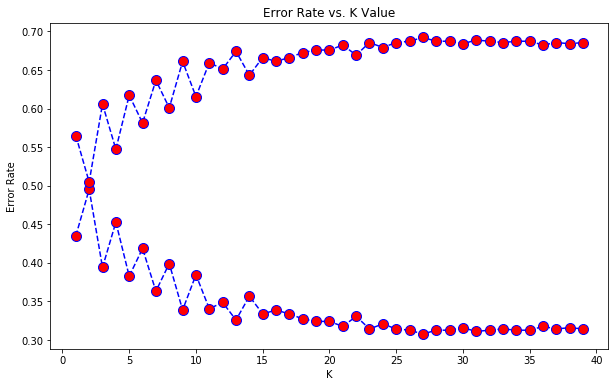

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [121]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7142857142857143

In [122]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')

In [123]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [124]:
model.score(X_test,y_test)

0.7402597402597403